Spring 2022
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

CIE 555, Neural Networks and Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center">Lab 4 </h3>
<h1 align="center">Training Neural Networks: Part I</h3>
<h2 align="center">Overfitting and Regularization</h2>
<h3 align="center">Anhar Hassan</h3>

---

Ibrahim Hamada Ibrahim    201800739


Lab Partner: Hazem Tarek 201800283

**Based on Eng. Shahd Seddik previous work.**

#Lab Objectives
* Understand the key steps when training a deep learning model.
* Understand the relationship between model complexity and overfitting.
* Learn how to detect overfitting and underfitting from a neural network's learning curve.
* Learn how to avoid overfitting using different regularization techniques.

# Steps of Training a Deep Learning Model

1. Define your problem
1. Prepare your data
1. Choose your model and appropriately initialize it
1. Train the chosen model
1. Improve results
1. Present results

# Dataset

One of the most often cited papers about deep learning in combination with a physics application:
*Searching for Exotic Particles in High-Energy Physics with Deep Learning* by Pierre Baldi, Peter Sadowski, Daniel Whiteson.

We will use the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY) to train a binary classification model.

The dataset contains 5,000,000 instances, with 18 features each.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'
columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]
raw_data = pd.read_csv(url, names = columns)

In [ ]:
dataset = raw_data.copy()
dataset.tail()

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689
4999999,0.0,0.761500,0.680454,-1.186213,1.043521,-0.316755,0.246879,1.120280,0.998479,1.640881,-0.797688,0.854212,1.121858,1.165438,1.498351,0.931580,1.293524,1.539167,0.187496


In [ ]:
features = np.array(dataset.drop(columns='signal'))
labels =np.array(dataset['signal']).reshape(-1,1)

We will take a subset of the data to save time. Skip the next two cells if you want to use the entire dataset.

In [ ]:
n_samples = 20000 # number of samples to take

indices = np.random.randint(features.shape[0], size = n_samples) # generate random indices

features = features[indices, :]
labels = labels[indices, :]
print(features.shape)
print(labels.shape)

(20000, 18)
(20000, 1)


## Pre-processing

Let's split our dataset into training and test sets.

Then, we will fit a pre-processing function to standardize features by removing the mean and scaling to unit variance.

The standard score of a sample $x$ is calculated as

$z = (x - \mu) / \sigma$

where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the training samples.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.10, random_state=42, shuffle=True)

# Set up preprocessing 
preprocessing_input = StandardScaler()
preprocessing_input.fit(X_train)

StandardScaler()

# Overfitting and Underfitting

Supervised machine learning can be thought of as approximating a target function $f$ that maps input point $X$ to output $y$ (i.e. $y=f(X)$).

It is crucial that the learned function be able to generalize well over new, unseen data. This allows us to make accurate predictions in the future on data the model has never seen.

So, what is overfitting? And when does it happen? (Discussion)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png"
 width="200px"> </center>
 
>- Overfitting refers to the problem when a model learns (or memorizes) the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
- What is meant by the representational capacity of a model?
- (Fill in the blank) Overfitting is more likely to happen when the model has ............... (larger/smaller) representational capacity.


On the other hand, underfitting happens when the model is neither able to model the training data nor able to generalize to new data.

To summarize:
<center><img src="https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415"
 width="400px"> </center>

 In the context of neural networks, overfitting and underfitting can be detected by looking at the training and validation loss during training.
 
<center><img src="https://drek4537l1klr.cloudfront.net/cai/Figures/08fig06_alt.jpg"
 width="600px"> </center>

 >- (Q) Assuming the three graphs above were generated from three different models over the same dataset. Which model is the most complex? Which is the least?

# Models

Let's build neural nets to solve this classification problem! We will build 4 different models with varying complexities to explore overfitting and underfitting.

Each model will use the same `compile` and `fit` methods, so let's code functions to make our code cleaner and more modular.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import adam_v2

BATCH_SIZE = 500
EPOCHS = 200

def get_optimizer():
  return adam_v2.Adam()

def compile_and_fit(model, optimizer=None, max_epochs=1000):
  if optimizer is None:
    optimizer = get_optimizer()
  
  # Compile model and print summary
  model.compile(optimizer = optimizer,
                loss = "binary_crossentropy",
                metrics = ['accuracy'])

  model.summary()

  # Fit model to training data
  history = model.fit(
    x = preprocessing_input.transform(X_train), # do not forget to normalize X
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = max_epochs,
    validation_split = 0.1)

  return history

# Create a dictionary to store the histories of all trained models
model_histories = {}

Now, let's get to building our 4 models! We will call them tiny model, small model, medium model, and large model.

In [ ]:
shape = features.shape[1]
# Model 1
tiny_model = Sequential([
    Dense(8, activation='relu', input_shape=(shape,)),
    Dense(1, activation="sigmoid")
])

# Model 2
small_model = Sequential([
    Dense(16, activation='relu', input_shape=(shape,)),
    Dense(16, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Model 3
medium_model = Sequential([
    Dense(64, activation='relu', input_shape=(shape,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Model 4
large_model = Sequential([
    Dense(512, activation='relu', input_shape=(shape,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Training

In [ ]:
model_histories['Tiny'] = compile_and_fit(tiny_model, max_epochs = EPOCHS)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 8)                 152       
                                                                 
 dense_124 (Dense)           (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 7ms/step - loss: 0.8840 - accuracy: 0.4610 - val_loss: 0.7911 - val_accuracy: 0.4961
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.5500 - val_loss: 0.6757 - val_accuracy: 0.5861
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6351 - val_loss: 0.6109 - val_accuracy: 0.6606
Epoch 4/200
33/33 [=========

In [ ]:
model_histories['Small'] = compile_and_fit(small_model, max_epochs = EPOCHS)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 16)                304       
                                                                 
 dense_126 (Dense)           (None, 16)                272       
                                                                 
 dense_127 (Dense)           (None, 1)                 17        
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 7ms/step - loss: 0.6642 - accuracy: 0.5872 - val_loss: 0.6042 - val_accuracy: 0.6750
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5749 - accuracy: 0.7190 - val_loss: 0.5473 - val_accuracy: 0.7278
Epoch 3/200
33/33 [==================

In [ ]:
model_histories['Medium']  = compile_and_fit(medium_model, max_epochs = EPOCHS)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 64)                1216      
                                                                 
 dense_129 (Dense)           (None, 64)                4160      
                                                                 
 dense_130 (Dense)           (None, 64)                4160      
                                                                 
 dense_131 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 0.5669 - accuracy: 0.7113 - val_loss: 0.4963 - val_accuracy: 0.7522
Epoch 2/200
33/33 [=======================

In [ ]:
model_histories['Large'] = compile_and_fit(large_model, max_epochs = EPOCHS)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 512)               9728      
                                                                 
 dense_133 (Dense)           (None, 512)               262656    
                                                                 
 dense_134 (Dense)           (None, 512)               262656    
                                                                 
 dense_135 (Dense)           (None, 512)               262656    
                                                                 
 dense_136 (Dense)           (None, 1)                 513       
                                                                 
Total params: 798,209
Trainable params: 798,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [============================

## Plot the training and validation losses

Let's build a function to help us generate clean plots.

In [ ]:
import matplotlib.pyplot as plt
import random

def plotter(history_dict):
  """
  Plots loss, val_loss of multiple models on the same graph.

  Input:
   - history_dict: dictionary of model names (keys) and history objects (values)
  """
  plt.figure(figsize=(8, 6))
  plt.xscale('log')
  #plt.xlim([5, max(plt.xlim())])
  plt.ylim([0.1, 0.7])
  plt.grid(True)
  
  for model_name in history_dict.keys(): # loop over the passed model names
    history = history_dict[model_name] # get history variable from the dictionary
    plt.plot(history.history['loss'],
             linestyle='-', # solid line
             label = model_name + ' Train')
    plt.plot(history.history['val_loss'],
             linestyle='--', # dashed line
             label = model_name + ' Val')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

  plt.legend(loc='lower left')
  plt.show()

Now, let's compare the learning curves of our four models. What do you notice?

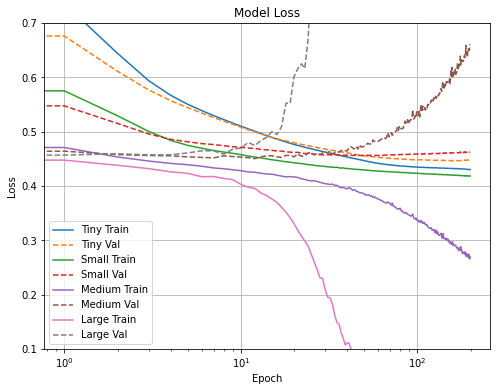

In [ ]:
plotter(model_histories)

# Evaluation

In [ ]:
tiny_loss, tiny_acc = tiny_model.evaluate(preprocessing_input.transform(X_test), y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7935


In [ ]:
small_loss, small_acc = small_model.evaluate(preprocessing_input.transform(X_test), y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7915


In [ ]:
medium_loss, medium_acc = medium_model.evaluate(preprocessing_input.transform(X_test), y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7550


In [ ]:
large_loss, large_acc = large_model.evaluate(preprocessing_input.transform(X_test), y_test)

63/63 [==============================] - 0s 2ms/step - loss: 3.1414 - accuracy: 0.7370


# Preventing Overfitting

As we have seen, overfitting happens when the model is too complex for the data. That is, when a simpler model exists that can accurately model the data, the more complex model is likely to overfit to the training samples.

To prevent this from happening, we can apply one or more regularization techniques. **Regularization** refers to modifications to the learning algorithm such that the model generalizes better. The idea is to penalize complexity so the model is forced to learn the simplest possible representation of the training data.

Multiple regularization techniques exist, such as:
1. Weight regularization
    1. L1
    2. L2
2. Dropout
3. Early stopping
4. Data augmentation
5. Noise injection

In this lab, we will explore the first three.

## Weight Regularization

One way to penalize complexity is to penalize large weights. This is done by adding all our parameters (weights) to our loss function. The new loss function thus becomes

$ J(w) + \frac{\lambda}{2} \sum_{j=1}^{M}\left|w_{j}\right|^{q}$

>- When $q=1$, we call it **L1 regularization** (we are adding what is called the "L1 norm" of the weights).
- When $q=2$, we call it **L2 regularization** (we are adding what is called the "L2 norm" of the weights).
- (Q) What happens when the parameter $\lambda$ is increased?

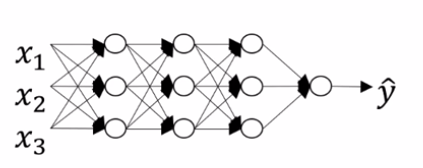

In [ ]:
regularizer_histories = {} # new dictioanry to store regularized model histories
regularizer_histories['Tiny'] = model_histories['Tiny']
regularizer_histories['Large'] = model_histories['Large']

In [ ]:
from keras.regularizers import l2

l2_lambda = 0.001
l2_model = Sequential([
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda),
                 input_shape = (shape,)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(1, activation = "sigmoid")
])

regularizer_histories['l2'] = compile_and_fit(l2_model, max_epochs = EPOCHS)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 512)               9728      
                                                                 
 dense_138 (Dense)           (None, 512)               262656    
                                                                 
 dense_139 (Dense)           (None, 512)               262656    
                                                                 
 dense_140 (Dense)           (None, 512)               262656    
                                                                 
 dense_141 (Dense)           (None, 1)                 513       
                                                                 
Total params: 798,209
Trainable params: 798,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [============================

## Dropout

The intuitive explanation for dropout is that we need to force each node to output features that are useful on their own.

Dropout involves randomly "dropping out" (i.e. setting to zero) a number of output features of a layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

The "dropout rate" is a hyperparameter specifying the fraction of features that are being zeroed-out; it is usually set between 0.2 and 0.5.

<center><img src="http://cs231n.github.io/assets/nn2/dropout.jpeg"
 width="400px"> </center>

Note that at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [ ]:
from keras.layers import Dropout

dropout_rate = 0.5
dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(shape,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, max_epochs = EPOCHS)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 512)               9728      
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                                 
 dense_143 (Dense)           (None, 512)               262656    
                                                                 
 dropout_29 (Dropout)        (None, 512)               0         
                                                                 
 dense_144 (Dense)           (None, 512)               262656    
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_145 (Dense)           (None, 512)             

Now, let's plot the learning curves. What do you notice?

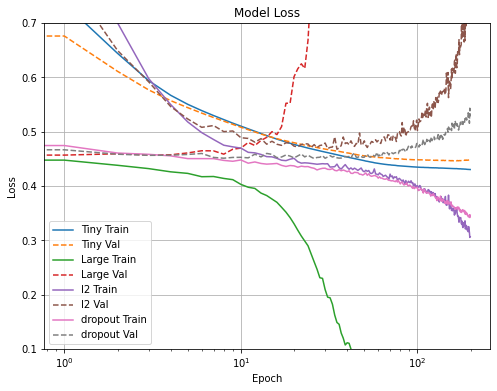

In [ ]:
plotter(regularizer_histories)

>(Discussion) Take another look at the loss curves of the dropout model. The model keeps improving until a certain point, after which it starts overfitting, resulting in a poor final model. Suggest one possible solution that can help improve the final model without changing any of its parameters.

In [ ]:
def plot1(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.xscale('log')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

# Task

Your task is to improve the learning curve even further by applying the following models:
1. Model 1: Add both L1 and L2 regularization to the large model. Adjust the parameters to minimize overfitting.
1. Model 2: Apply early stopping to the large model with dropout and choose appropriate parameters.
1. Plot the losses of each of the new models. Comment on your results.

**Firstly, I used the generated results from large model without preventing overfitting to compare my results with.**


---





In [ ]:
regularized_histories_task = {} # new dictioanry to store regularized model histories
regularized_histories_task['Large'] = model_histories['Large']

# Model 1

*   **In the following model, L1 Regulariztion is applied on the large model.**
*   **I tried different lambda and found out that the best value for it is 0.0004.**
*   **This value led to having the validation accuracy very close to the training accuracy (~80%).**
*   **So that the model behaves in a similar manner on both training and validation data.**


In [ ]:
from keras.regularizers import l1

l1_lambda = 0.0004
l1_model = Sequential([
    Dense(512, activation = 'relu',
                 kernel_regularizer = l1(l1_lambda),
                 input_shape = (shape,)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l1(l1_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l1(l1_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l1(l1_lambda)),
    Dense(1, activation = "sigmoid")
])

regularized_histories_task['l1'] = compile_and_fit(l1_model, max_epochs = EPOCHS)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 512)               9728      
                                                                 
 dense_148 (Dense)           (None, 512)               262656    
                                                                 
 dense_149 (Dense)           (None, 512)               262656    
                                                                 
 dense_150 (Dense)           (None, 512)               262656    
                                                                 
 dense_151 (Dense)           (None, 1)                 513       
                                                                 
Total params: 798,209
Trainable params: 798,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [============================

*   **In the following model, L2 Regulariztion is applied on the large model.**
*   **I tried different lambda and found out that the best value for it is 0.01.**
*   **This value led to having the validation accuracy very close to the training accuracy (~79%).**
*   **So that the model behaves in a similar manner on both training and validation data.**


In [ ]:
from keras.regularizers import l2

l2_lambda = 0.01
l2_model = Sequential([
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda),
                 input_shape = (shape,)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(1, activation = "sigmoid")
])

regularized_histories_task['l2'] = compile_and_fit(l2_model, max_epochs = EPOCHS)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 512)               9728      
                                                                 
 dense_168 (Dense)           (None, 512)               262656    
                                                                 
 dense_169 (Dense)           (None, 512)               262656    
                                                                 
 dense_170 (Dense)           (None, 512)               262656    
                                                                 
 dense_171 (Dense)           (None, 1)                 513       
                                                                 
Total params: 798,209
Trainable params: 798,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [============================

# Model 2

*   **In order to implement the early stopping method, I added the early stopping callback to compile and fit function.**
*   **The monitor ic chosen to be the validation loss.**
*   **I tried different values for patience and the value of 15 gives optimal results.**
*   **The model behaves in a similar manner on both training and validation data with the same loss and accuracy of (~80%).**





In [ ]:
from keras.callbacks import EarlyStopping

def compile_and_fit_early_stop(model, optimizer=None, max_epochs=1000):
  if optimizer is None:
    optimizer = get_optimizer()
  
  # Compile model and print summary
  model.compile(optimizer = optimizer,
                loss = "binary_crossentropy",
                metrics = ['accuracy'])

  model.summary()
  keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=15, mode='min', min_delta=0.0001)]

  # Fit model to training data
  history = model.fit(
    x = preprocessing_input.transform(X_train), # do not forget to normalize X
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = max_epochs,
    validation_split = 0.1,
    callbacks=keras_callbacks)

  return history

In [ ]:
from keras.layers import Dropout

dropout_rate = 0.5
dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(shape,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

regularized_histories_task['dropout_early_stop'] = compile_and_fit_early_stop(dropout_model, max_epochs = EPOCHS)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 512)               9728      
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_173 (Dense)           (None, 512)               262656    
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_174 (Dense)           (None, 512)               262656    
                                                                 
 dropout_38 (Dropout)        (None, 512)               0         
                                                                 
 dense_175 (Dense)           (None, 512)             

# Task 3

**Here I plotted the losses of the modified models**

*   **The model that shows the best results is the model that uses dropout and early stopping to avoid overfitting since it leads to the minimum loss on both validation and training data.**




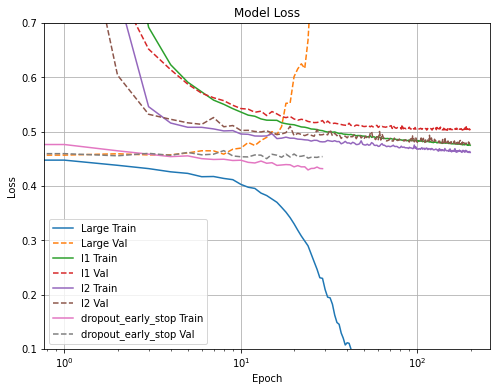

In [ ]:
plotter(regularized_histories_task)

## Bonus Questions

1. [0.5 pt] In the code above, we used `kernel_regularizer`. What is the difference between `kernel_regularizer`, `bias_regularizer`, and`activity_regularizer` in Keras?
> Answer:

*   **`kernel_regularizer`: is used to apply penalty on the kernels of layers.**
*   **`bias_regularizer`: is used to apply penalty on the bias of the layers.** 
*   **`activity_regularizer`: is used to apply penalty on the output of the layers.**


1. [0.5 pt] Why not to use the dropout during testing instead of scaling?
> Answer:
**Because the dropout is done randomly by dropping random neurons so that it can't be using during testing.**
1. [1 pt] What is the difference between the effect of L1 regularization and that of L2 regularization? Explain in light of the figure below.
<center><img src="https://miro.medium.com/max/602/0*_pKBpbrub8v6np5x.png" width="300px"></center>

> Answer:

**L1 regularization can be used in feauture selection since optimizing the loss function will lead to have one of the weights equal zero (which is shown in the figure "w1 = 0"). On the other hand L2 regularization prevent overfitting by putting constraints on the weights, but it doesn't select some features and get rid of the others.**